In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn import preprocessing 
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Read in data and display first 5 rows
df  = pd.read_csv(r'F:\wenqu\environment_factors\zonal_statistics\combine\environment_traits.csv')
print(df)

    sla_ymax   la_ymax  d15n_ymax  d13c_ymax  ldmc_ymax   pc_ymax  rad_mean  \
0   4.667542  2.441163  -4.481572 -28.757311   0.001383  3.848529  0.723764   
1   4.530001  1.188826  -0.964255 -28.556331  -1.216922  3.823532  0.948477   
2   4.595676  1.812050  -2.238237 -28.626384  -0.693791  3.839281  0.809001   
3   4.582486  1.704484  -3.021732 -28.810050  -0.289003  3.831236  0.560861   
4   4.558536  1.780689  -2.687985 -28.809668  -0.425025  3.840008  0.841348   
5   4.505967  1.085972   0.118953 -28.276577  -1.185542  3.831870  1.489406   
6   4.575741  1.657605  -1.663474 -28.466287  -0.538496  3.824850  1.417796   
7   4.629418  2.212281  -4.878559 -29.063377   0.345497  3.822984  0.713318   
8   4.717273  3.048991  -5.704745 -28.789680   0.495936  3.843249  0.988197   
9   4.576067  1.336595  -1.742399 -28.974865  -0.721712  3.809160  0.947850   
10  4.507999  2.259795  -1.990826 -28.830089  -0.031865  3.849062  1.686459   
11  4.528262  1.535051  -2.263005 -28.825243  -0.404

In [3]:
print(df.dtypes)

sla_ymax                float64
la_ymax                 float64
d15n_ymax               float64
d13c_ymax               float64
ldmc_ymax               float64
pc_ymax                 float64
rad_mean                float64
slope_mean              float64
snow_mean               float64
TWI_mean                float64
ecoregion                object
soil_type                object
latitude                float64
SWI_Mean                float64
summer_precipitation    float64
summer_temperature      float64
annnual_precp           float64
annual_temp             float64
dtype: object


In [4]:
df['soil_type'].nunique()#7
df['soil_type'].unique()

array(['Gravelly Riverine', 'Rocky Glaciated Upland',
       'Rocky Acidic Alpine', 'Peaty Glaciated Upland',
       'Rocky Alkaline Alpine', 'Rocky Upland', 'Peaty Lowland'],
      dtype=object)

## one hot-encoder to process soiltype (categorical data) to numerical

In [3]:
label_encoder = preprocessing.LabelEncoder()
df['soil_type']= label_encoder.fit_transform(df['soil_type']) 
df['ecoregion']= label_encoder.fit_transform(df['ecoregion']) 
  
df['soil_type'].unique() 

array([0, 5, 3, 1, 4, 6, 2])

In [4]:
df

,sla_ymax,la_ymax,d15n_ymax,d13c_ymax,ldmc_ymax,pc_ymax,rad_mean,slope_mean,snow_mean,TWI_mean,ecoregion,soil_type,latitude,SWI_Mean,summer_precipitation,summer_temperature,annnual_precp,annual_temp
0,4.667542,2.441163,-4.481572,-28.757311,0.001383,3.848529,0.723764,10.631270,133.595238,3.600357,2,0,67.116250,11.250460,48.000000,12.966667,309.000000,-5.129167
1,4.530001,1.188826,-0.964255,-28.556331,-1.216922,3.823532,0.948477,3.511854,132.930417,1.846235,4,0,67.246138,13.248380,47.831579,12.480702,298.505263,-5.505175
2,4.595676,1.812050,-2.238237,-28.626384,-0.693791,3.839281,0.809001,8.257868,133.834475,3.463253,4,5,67.343080,13.514382,47.438127,12.202564,294.782609,-5.764130
3,4.582486,1.704484,-3.021732,-28.810050,-0.289003,3.831236,0.560861,21.200271,134.515462,3.820470,4,3,67.358854,11.594050,49.306748,11.498978,305.822086,-6.291104
4,4.558536,1.780689,-2.687985,-28.809668,-0.425025,3.840008,0.841348,19.174029,135.589258,4.040876,4,3,67.502130,15.046018,47.945946,11.106306,296.337838,-6.762613
5,4.505967,1.085972,0.118953,-28.276577,-1.185542,3.831870,1.489406,19.178764,135.854267,4.316540,4,3,67.274542,13.079801,49.290323,12.080645,317.032258,-5.647177
6,4.575741,1.657605,-1.663474,-28.466287,-0.538496,3.824850,1.417796,12.355424,134.464789,4.287929,2,1,67.049277,11.142167,49.000000,12.533333,313.000000,-5.458333
7,4.629418,2.212281,-4.878559,-29.063377,0.345497,3.822984,0.713318,8.991587,129.199306,4.931317,2,1,67.148267,10.945116,48.588235,12.698039,313.117647,-5.412990
8,4.717273,3.048991,-5.704745,-28.789680,0.495936,3.843249,0.988197,3.542509,131.999952,4.275951,2,1,67.093300,10.886591,48.277778,13.021380,308.419192,-5.309764
9,4.576067,1.336595,-1.742399,-28.974865,-0.721712,3.809160,0.947850,5.196530,134.408582,2.623237,4,0,67.926568,8.895476,46.391304,9.815942,282.695652,-7.809783


In [7]:
# List the columns you want to keep
columns_to_keep = ['la_ymax', 'sla_ymax', 'd15n_ymax', 'd13c_ymax', 'ldmc_ymax','pc_ymax', 'rad_mean', 'slope_mean', 'snow_mean', 'TWI_mean', 
                   'ecoregion', 'soil_type', 'latitude', 'SWI_Mean', 'summer_precipitation',
                  'summer_temperature', 'annnual_precp', 'annual_temp']

# Create a new DataFrame with only the selected columns
new_df = df[columns_to_keep]

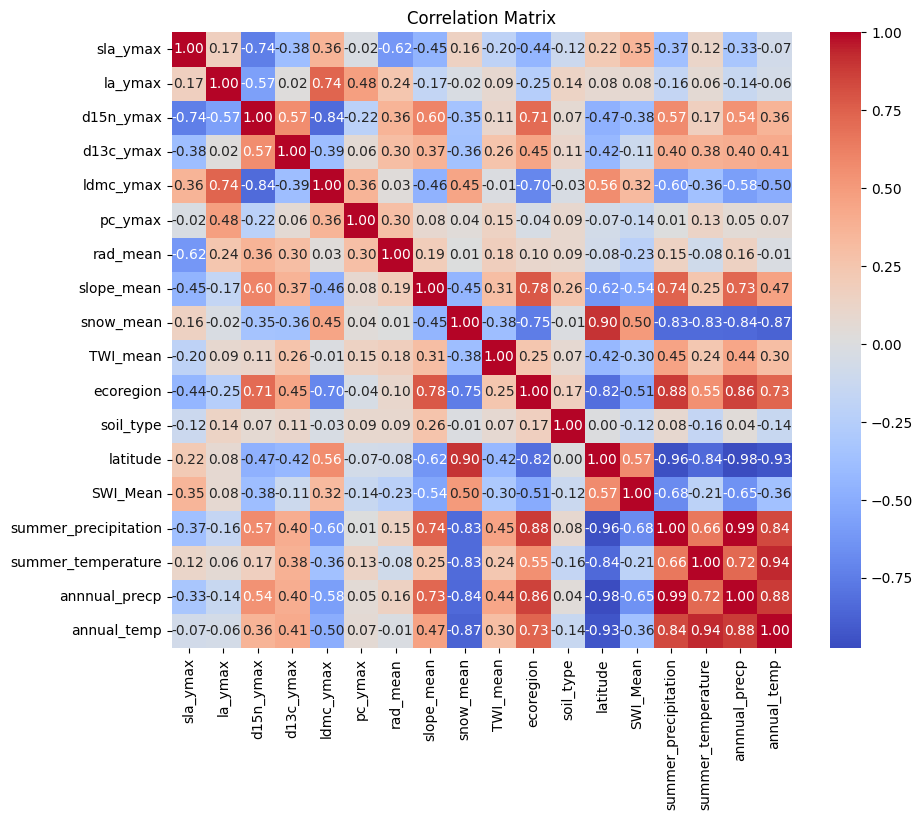

In [8]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
X = df[['rad_mean', 'slope_mean', 'snow_mean', 'TWI_mean', 'ecoregion', 
        'soil_type', 'latitude', 'SWI_Mean','summer_precipitation',
                  'summer_temperature', 'annnual_precp', 'annual_temp' ]]

In [10]:
# Saving feature names for later use
feature_list = list(X.columns)
feature_list

['rad_mean',
 'slope_mean',
 'snow_mean',
 'TWI_mean',
 'ecoregion',
 'soil_type',
 'latitude',
 'SWI_Mean',
 'summer_precipitation',
 'summer_temperature',
 'annnual_precp',
 'annual_temp']

In [11]:
X = X.to_numpy()

In [12]:
x_columns = ['rad_mean', 'slope_mean', 'snow_mean', 'TWI_mean', 'ecoregion', 
        'soil_type', 'latitude', 'SWI_Mean','summer_precipitation',
                  'summer_temperature', 'annnual_precp', 'annual_temp']

In [13]:
y_d15n_yamx = df['d15n_ymax'].to_numpy()
y_la_ymax = df['la_ymax'].to_numpy()
y_ldmc_ymax = df['ldmc_ymax'].to_numpy()
y_pc_ymax = df['pc_ymax'].to_numpy()
y_sla_ymax = df['sla_ymax'].to_numpy()
y_d13c_ymax = df['d13c_ymax'].to_numpy()

In [14]:
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['d15n_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              d15n_ymax   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              40.21
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    3.86e-12
Time:                        23:34:58   Log-Likelihood:                         -37.972
No. Observations:                  34   AIC:                                      99.94
Df Residuals:                      22   BIC:                                      118.3
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [15]:
x_columns.remove("annual_temp")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              d15n_ymax   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              45.79
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    5.59e-13
Time:                        23:35:25   Log-Likelihood:                         -37.997
No. Observations:                  34   AIC:                                      97.99
Df Residuals:                      23   BIC:                                      114.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [16]:
x_columns.remove("SWI_Mean")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              d15n_ymax   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              52.51
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    7.50e-14
Time:                        23:36:11   Log-Likelihood:                         -38.011
No. Observations:                  34   AIC:                                      96.02
Df Residuals:                      24   BIC:                                      111.3
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [17]:
x_columns.remove("slope_mean")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              d15n_ymax   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              59.84
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    1.11e-14
Time:                        23:36:35   Log-Likelihood:                         -38.263
No. Observations:                  34   AIC:                                      94.53
Df Residuals:                      25   BIC:                                      108.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [18]:
x_columns.remove("TWI_mean")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              d15n_ymax   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              68.92
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    1.54e-15
Time:                        23:37:01   Log-Likelihood:                         -38.518
No. Observations:                  34   AIC:                                      93.04
Df Residuals:                      26   BIC:                                      105.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [19]:
x_columns.remove("summer_temperature")
x_columns.remove("snow_mean")
x_columns.remove("soil_type")
x_columns.remove("summer_precipitation")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              d15n_ymax   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              123.3
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    3.59e-18
Time:                        23:38:21   Log-Likelihood:                         -42.623
No. Observations:                  34   AIC:                                      93.25
Df Residuals:                      30   BIC:                                      99.35
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [20]:
x_columns.remove("annnual_precp")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              d15n_ymax   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              149.5
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    1.61e-18
Time:                        23:39:01   Log-Likelihood:                         -44.664
No. Observations:                  34   AIC:                                      95.33
Df Residuals:                      31   BIC:                                      99.91
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [6]:
x = df[['rad_mean', 'ecoregion', 'latitude', 'annnual_precp']]
X_train, X_test, y_train, y_test = train_test_split(x, df['d15n_ymax'], test_size=0.3, random_state=0)

In [7]:
lr = LinearRegression()
lr.fit(X_train,y_train)
# Predict the target values on the testing set
y_pred = lr.predict(X_test)

# Calculate the R^2 score
r2 = lr.score(X_test, y_test)

In [8]:
r2

0.32452569735303993

In [12]:
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['la_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                la_ymax   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              38.33
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    6.32e-12
Time:                        23:09:13   Log-Likelihood:                         -20.156
No. Observations:                  34   AIC:                                      64.31
Df Residuals:                      22   BIC:                                      82.63
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [13]:
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['sla_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:               sla_ymax   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.873e+04
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    3.12e-43
Time:                        23:09:43   Log-Likelihood:                          64.180
No. Observations:                  34   AIC:                                     -104.4
Df Residuals:                      22   BIC:                                     -86.04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [14]:
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['d13c_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              d13c_ymax   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.020e+04
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    7.75e-45
Time:                        23:10:05   Log-Likelihood:                          7.3837
No. Observations:                  34   AIC:                                      9.233
Df Residuals:                      22   BIC:                                      27.55
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [15]:
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['d15n_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              d15n_ymax   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              40.21
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    3.86e-12
Time:                        23:10:24   Log-Likelihood:                         -37.972
No. Observations:                  34   AIC:                                      99.94
Df Residuals:                      22   BIC:                                      118.3
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [16]:
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['ldmc_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              ldmc_ymax   R-squared (uncentered):                   0.618
Model:                            OLS   Adj. R-squared (uncentered):              0.410
Method:                 Least Squares   F-statistic:                              2.967
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                      0.0131
Time:                        23:10:41   Log-Likelihood:                         -7.6182
No. Observations:                  34   AIC:                                      39.24
Df Residuals:                      22   BIC:                                      57.55
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [15]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X, df['d15n_ymax'], test_size=0.3)

In [18]:
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [19]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              d15n_ymax   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              19.33
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    1.15e-05
Time:                        23:11:16   Log-Likelihood:                         -23.850
No. Observations:                  23   AIC:                                      71.70
Df Residuals:                      11   BIC:                                      85.33
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7863      0.969      1.843      0.092      -0.347       3.920
x2             0.0249      0.057      0.433      0.673      -0.101       0.151
x3             0.0599      0.104      0.578      0.575      -0.168       0.288
x4            -0.0063      0.349     -0.018      0.986      -0.774       0.762
x5             0.7825      0.477      1.639      0.130      -0.268       1.833
x6            -0.1687      0.157     -1.076      0.305      -0.514       0.177
x7            -0.3321      0.311     -1.067      0.309      -1.017       0.353
x8             0.0913      0.194      0.471      0.647      -0.335       0.518
x9             0.3387      0.423      0.801      0.440      -0.592       1.269
x10            0.5238      0.641      0.818      0.431      -0.887       1.934
x11           -0.0605      0.079     -0.763      0.462      -0.235       0.114
x12           -0.4425      0.893     -0.496      0.630      -2.408       1.523
==============================================================================
Omnibus:                        0.915   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.909
Skew:                           0.371   Prob(JB):                        0.635
Kurtosis:                       2.368   Cond. No.                     1.68e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

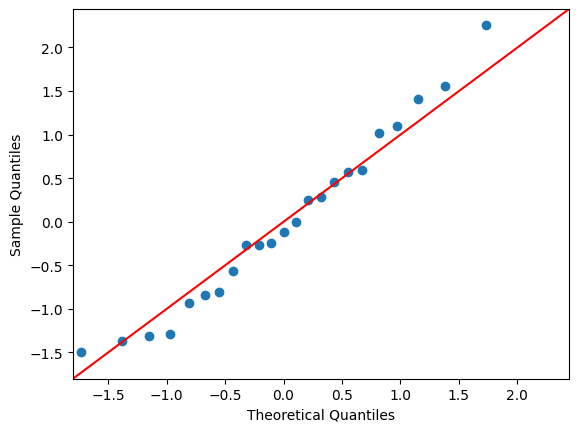

In [21]:
res = fitted_full_model.resid

# qqplot ; normality analysis of residual
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

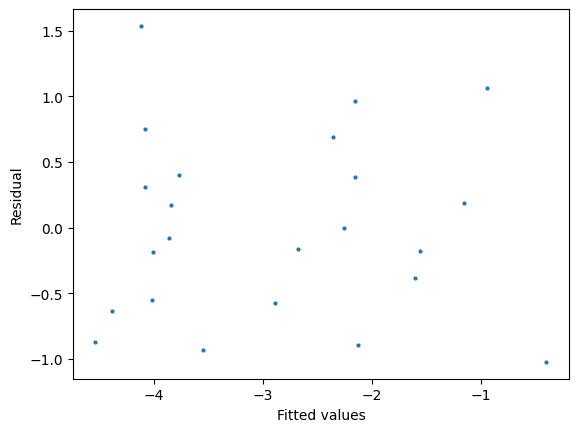

In [22]:
pred_y = fitted_full_model.predict(train_x)

# residual pattern ; check homoscedasticity
fig = plt.scatter(pred_y, res, s=4)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

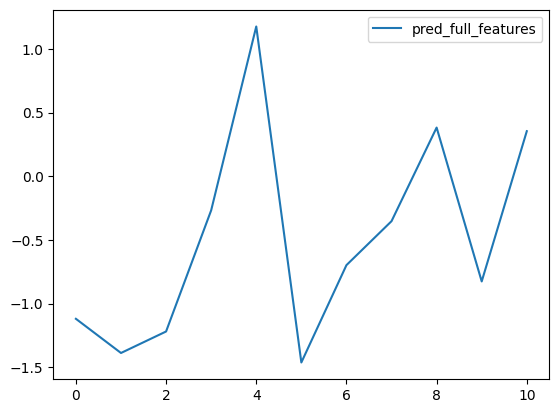

In [21]:
pred_y2 = fitted_full_model.predict(test_x)
# residual plot
plt.plot(np.array(test_y-pred_y2), label='pred_full_features')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
# MSE 
mse = mean_squared_error(test_y, pred_y2)
# RMSE
rmse = np.sqrt(mse)
print('mse:', mse)
print('rmse:', rmse)

mse: 0.8929366605343412
rmse: 0.944953258386012


In [24]:
feature_columns = ['rad_mean', 'slope_mean', 'snow_mean', 'TWI_mean', 'ecoregion', 'soil_type', 'latitude', 'SWI_Mean' ]

In [27]:
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['la_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                la_ymax   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              35.72
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                    4.16e-12
Time:                        21:54:21   Log-Likelihood:                         -35.171
No. Observations:                  34   AIC:                                      86.34
Df Residuals:                      26   BIC:                                      98.55
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['ldmc_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              ldmc_ymax   R-squared (uncentered):                   0.469
Model:                            OLS   Adj. R-squared (uncentered):              0.305
Method:                 Least Squares   F-statistic:                              2.868
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                      0.0198
Time:                        21:54:52   Log-Likelihood:                         -13.807
No. Observations:                  34   AIC:                                      43.61
Df Residuals:                      26   BIC:                                      55.82
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['pc_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                pc_ymax   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.596e+04
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                    4.78e-53
Time:                        21:55:13   Log-Likelihood:                          71.906
No. Observations:                  34   AIC:                                     -127.8
Df Residuals:                      26   BIC:                                     -115.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['sla_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:               sla_ymax   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.207e+04
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                    8.54e-48
Time:                        21:55:53   Log-Likelihood:                          49.746
No. Observations:                  34   AIC:                                     -83.49
Df Residuals:                      26   BIC:                                     -71.28
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['d13c_ymax'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              d13c_ymax   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.623e+04
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                    4.64e-46
Time:                        21:56:23   Log-Likelihood:                         -17.557
No. Observations:                  34   AIC:                                      51.11
Df Residuals:                      26   BIC:                                      63.32
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['d15n_std'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:               d15n_std   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              533.1
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                    8.17e-27
Time:                        21:59:15   Log-Likelihood:                         -10.863
No. Observations:                  34   AIC:                                      37.73
Df Residuals:                      26   BIC:                                      49.94
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['la_std'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 la_std   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              499.7
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                    1.88e-26
Time:                        21:59:39   Log-Likelihood:                          4.9987
No. Observations:                  34   AIC:                                      6.003
Df Residuals:                      26   BIC:                                      18.21
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['ldmc_std'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:               ldmc_std   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              602.8
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                    1.67e-27
Time:                        22:06:33   Log-Likelihood:                          43.575
No. Observations:                  34   AIC:                                     -71.15
Df Residuals:                      26   BIC:                                     -58.94
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
def get_stats():
    x = df[x_columns]
    results = sm.OLS(df['sla_std'], x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                sla_std   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              667.0
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                    4.53e-28
Time:                        22:07:05   Log-Likelihood:                          68.727
No. Observations:                  34   AIC:                                     -121.5
Df Residuals:                      26   BIC:                                     -109.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
sns.pairplot(fuel2001_3, kind= 'scatter', height= 2) 
plt.show();